# Download Dataset

The first step is to download our dataset. The task we are going to be performing is face detection in the wild.
Steps:
1. Create your Roboflow account
2. Download the FDDB dataset with coco annotations.
3. Move the dataset to your google drive.

In [ ]:
!curl -L "your-roboflow-link" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

# Define the source and destination paths
source_dir = '/content'  # Assuming the files are in the current Colab environment
destination_dir = '/content/drive/MyDrive/FDDB'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Define the files and folders to move
items_to_move = ['/train', '/valid', 'README.dataset.txt', 'README.roboflow.txt']

# Move the items
for item in items_to_move:
    source_path = os.path.join(source_dir, item)
    destination_path = os.path.join(destination_dir, item)

    if os.path.exists(source_path):
        if os.path.isdir(source_path):
          !mv "$source_path" "$destination_dir"
        else:
          !mv "$source_path" "$destination_dir"
    else:
        print(f"Warning: {item} not found in {source_dir}")

# Face Detection Tutorial using SSD and FDDB Dataset

## 1. Dataset Overview

### 1.1 FDDB Dataset Structure
The Face Detection Data Set and Benchmark (FDDB) is a standard face detection benchmark consisting of 2,845 images containing 5,171 annotated faces. For this tutorial, we'll be using a COCO-formatted version of FDDB, which structures the data as follows:

```
FDDB/
├── train/
│   └── image1.jpg
│   └── ...
│   └── ...
│   └── imageN.jpg
│   └── _annotations.coco.json
└── valid/
    └── image1.jpg
    └── ...
    └── ...
    └── imageN.jpg
    └── _annotations.coco.json
```
### 1.2 Annotation Format
The COCO format annotations file (`_annotations.coco`) contains the following structure:
```json
{
    "images": [
        {
            "id": 1,
            "file_name": "2002/07/19/big/img_391.jpg",
            "height": 600,
            "width": 800
        },
        ...
    ],
    "annotations": [
        {
            "id": 1,
            "image_id": 1,
            "bbox": [x, y, width, height],  # In pixels
            "category_id": 1  # 1 for face
        },
        ...
    ],
    "categories": [
        {
            "id": 1,
            "name": "face"
        }
    ]
}
```

### 1.3 Expected Data Format
Our data loader needs to transform this into a format suitable for training SSD:

1. **Images**:
   - Loaded as RGB
   - Resized to standard dimensions (e.g., 300x300 for SSD)
   - Normalized with ImageNet statistics
   - Returned as torch tensors

2. **Annotations**:
   - Bounding boxes in [x1, y1, x2, y2] format
   - Coordinates normalized to [0, 1] range
   - Labels as tensor (1 for face, 0 for background)
   - Additional fields required by the detection framework:
     - `boxes`: Face bounding boxes
     - `labels`: Class labels (face/background)
     - `image_id`: Unique identifier for each image
     - `area`: Area of each bounding box
     - `iscrowd`: Always 0 for this dataset

You'll implement a dataset class and data loaders for face detection using the FDDB dataset in COCO format. This implementation involves:
1. Loading and processing annotations
2. Image handling and transformations
3. Creating data loaders for training, validation, and testing




## 1. Data Loading Implementation


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
import json
import os
from PIL import Image
import torch

class FDDBDataset(Dataset):
    """
    FDDB Dataset class for face detection

    Args:
        root_dir (str): Root directory containing images and annotations
        transforms (callable, optional): Optional image transforms
        split (str): Dataset split - 'train', 'val', or 'test'
    """
    def __init__(self, root_dir, transforms=None, split='train'):
        """
        TODO 1: Initialize dataset
        - Store input parameters
        - Load COCO format annotations
        - Create image to annotations mapping

        Steps:
        1. Load annotation file based on split ('train' or 'test' folder)
        2. Parse COCO JSON format
        3. Create mapping from image_id to annotations for efficient access
        4. Store image information

        Hint: COCO JSON structure has 'images' and 'annotations' lists
        """
        pass

    def __getitem__(self, idx):
        """
        TODO 2: Get a single item from dataset

        Steps:
        1. Get image info using index
        2. Load and process image:
            - Construct correct image path
            - Open image with PIL
            - Convert to RGB
            - Get original dimensions

        3. Get annotations for image:
            - Find all annotations with matching image_id
            - Convert COCO format [x, y, w, h] to [x1, y1, x2, y2]
            - Handle invalid annotations (None values)

        4. Process data:
            - Resize image to 300x300
            - Adjust bounding boxes for new size
            - Convert boxes to tensor
            - Create target dictionary with required fields

        5. Apply transforms if provided

        Returns:
            tuple: (image, target_dict)
            - image: Transformed PIL Image or tensor
            - target_dict: Dictionary containing:
                - boxes: tensor[N, 4]
                - labels: tensor[N]
                - image_id: tensor[1]
                - area: tensor[N]
                - iscrowd: tensor[N]

        Hint: Remember to scale bounding boxes when resizing image
        """
        pass

    def __len__(self):
        """
        TODO 3: Return dataset length
        """
        pass


def get_data_loaders(data_path, batch_size=32):
    """
    Create train, validation, and test data loaders

    TODO 4: Implement data loader creation

    Steps:
    1. Define transforms for each split:
        - Training: Consider adding augmentations
        - Validation/Test: Only basic transforms

    2. Create datasets:
        - Create full training dataset
        - Split training data into train/val
        - Create separate test dataset

    3. Create data loaders:
        - Use appropriate batch size
        - Set shuffle for training
        - Use correct number of workers
        - Include collate_fn for batching

    Args:
        data_path (str): Path to dataset directory
        batch_size (int): Batch size for data loaders

    Returns:
        tuple: (train_loader, val_loader, test_loader)

    Hints:
    - Use torch.utils.data.random_split for train/val split
    - Common split ratio is 80% train, 20% validation
    - Remember to handle variable size images in collate_fn
    """
    pass


def collate_fn(batch):
    """
    TODO 5: Implement custom collate function

    Steps:
    1. Separate images and targets from batch
    2. Stack images into a single tensor
    3. Create list of target dictionaries

    Args:
        batch: List of tuples (image, target)

    Returns:
        tuple: (images, targets)
        - images: Stacked tensor of images
        - targets: List of target dictionaries

    Hint: Cannot stack targets due to variable number of objects
    """
    pass

Let's see if our data loader works!

In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T
import json
import os
from PIL import Image

# Assuming FDDBDataset, get_data_loaders, and collate_fn are defined as in the provided code

# Specify the path to your dataset
data_path = "/content/drive/MyDrive/FDDB/train"  # Replace with the actual path

# Test the dataset and dataloader
train_loader, val_loader, test_loader = get_data_loaders(data_path, batch_size=2)  # Use a small batch size for testing

# Iterate through the train_loader
for images, targets in train_loader:
    print("Images shape:", images.shape)  # Print the shape of the image batch
    # Access individual targets
    for i, target in enumerate(targets):
        print(f"Target {i}:")
        print(f"  Boxes: {target['boxes']}")
        print(f"  Labels: {target['labels']}")
        # ... access other target elements ...

    break # Break after the first batch for testing

# Iterate through the val_loader
for images, targets in val_loader:
    print("Images shape:", images.shape) # Print the shape of the image batch
    # Access individual targets
    for i, target in enumerate(targets):
        print(f"Target {i}:")
        print(f"  Boxes: {target['boxes']}")
        print(f"  Labels: {target['labels']}")
        # ... access other target elements ...
    break # Break after the first batch for testing

# Iterate through the test_loader
for images, targets in test_loader:
    print("Images shape:", images.shape) # Print the shape of the image batch
    # Access individual targets
    for i, target in enumerate(targets):
        print(f"Target {i}:")
        print(f"  Boxes: {target['boxes']}")
        print(f"  Labels: {target['labels']}")
        # ... access other target elements ...
    break # Break after the first batch for testing

print("Dataset and dataloader tested successfully!")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Iterate through the val_loader
for images, targets in val_loader:
    for i, (image, target) in enumerate(zip(images, targets)):
        # Convert image tensor to numpy array and reverse normalization
        image_np = image.permute(1, 2, 0).numpy()
        image_np = (image_np * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406]
        image_np = (image_np * 255).astype('uint8')

        # Create figure and axes
        fig, ax = plt.subplots(1)

        # Display the image
        ax.imshow(image_np)

        # Draw bounding boxes
        boxes = target['boxes']
        for box in boxes:
            x1, y1, x2, y2 = box
            rect = patches.Rectangle((x1, y1), (x2 - x1), (y2 - y1), linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

        # Display the plot
        plt.show()

    break # Break after the first batch for testing

This should display two images on the notebook with the appropriate bounding box.

# Single Shot Detector (SSD) Implementation Tutorial

## 1. Theoretical Background

### 1.1 What is SSD?
Single Shot Detector (SSD) is a popular object detection architecture that performs detection in a single forward pass, making it both efficient and accurate. The key innovations of SSD include:

- Multi-scale feature maps for detection at different scales
- Default (anchor) boxes at each feature map cell
- Single-stage detection (classification + localization)

### 1.2 Architecture Overview
SSD uses VGG16 as its backbone network, followed by additional convolutional layers that progressively decrease in size. Key components:

- Base network (VGG16 up to conv5_3)
- Additional conv layers (conv6 to conv11)
- Multiple feature maps for detection (conv4_3, conv7, conv8_2, conv9_2, conv10_2, conv11_2)
- Default boxes at each cell of each feature map
- Two parallel heads for each feature map:
  - Classification head (class scores)
  - Regression head (box coordinates)

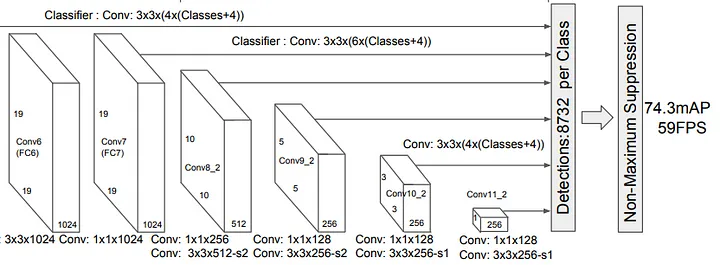



Image Credit: Liu, W. et al. (2016). SSD: Single Shot MultiBox Detector. In: Leibe, B., Matas, J., Sebe, N., Welling, M. (eds) Computer Vision – ECCV 2016. ECCV 2016. Lecture Notes in Computer Science(), vol 9905. Springer, Cham. https://doi.org/10.1007/978-3-319-46448-0_2

## 2. Implementation

### 2.1 Base Network Implementation

First, let's implement the base network using VGG16. Students need to complete the following code:

In [ ]:
# Student Implementation
import torch
import torch.nn as nn
import torchvision.models as models

class SSDBase(nn.Module):
    """
    TODO: Implement the SSD base network using pretrained VGG16 that:
    1. Loads pretrained VGG16 weights from torchvision
    2. Modifies the network for SSD requirements (stop at conv5_3)
    3. Freezes early layers for transfer learning

    Hints:
    - Use torchvision.models.vgg16(pretrained=True)
    - Keep layers up to conv5_3 (features[23])
    - Consider which layers to freeze
    """
    def __init__(self):
        super(SSDBase, self).__init__()
        pass

    def forward(self, x):
        pass

### HINT
You can use this snippet to see the dimensions of the VGG block at each layer and see where to extract features from.

In [ ]:
from torchsummary import summary

# Assuming your SSDBase model is defined as in the previous code
model = SSDBase()

# Move the model to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Input size for the summary
input_size = (3, 300, 300)

# Print the model summary
summary(model, input_size=input_size)

### 2.2 Extra Feature Layers

Students need to implement the additional convolutional layers:

In [ ]:
# Student Implementation
class ExtraFeatureLayers(nn.Module):
    def __init__(self):
        super(ExtraFeatureLayers, self).__init__()
        # TODO: Implement the extra feature layers (conv6 to conv11)
        # Hint: Use similar structure as base network but with decreasing spatial dimensions

    def forward(self, x):
        # TODO: Implement forward pass
        # Return all feature maps that will be used for detection
        pass

### 2.3 Detection Heads

Students implement the classification and regression heads:

In [ ]:
# Student Implementation
class DetectionHeads(nn.Module):
    def __init__(self, num_classes):
        super(DetectionHeads, self).__init__()
        # TODO: Implement classification and regression heads for each feature map
        # Hint: Use nn.ModuleList for multiple heads
        self.num_classes = num_classes
        self.num_default_boxes = [4, 6, 6, 6, 4, 4]  # Number of default boxes for each feature map

    def forward(self, features):
        # TODO: Implement forward pass
        # Return classification scores and regression coordinates for each feature map
        pass

In [ ]:
# check the sizes of the features which are bein sent to the Detection Heads

# Iterate through the val_loader for testing
base_network = SSDBase()
extra_features_layers = ExtraFeatureLayers()
detection_heads = DetectionHeads(num_classes=2)  # 1 classes + background

for images, targets in val_loader:
    conv4_3_feats, conv5_feats = base_network(images)
    print(f"conv4_3_feats shape: {conv4_3_feats.shape}")  # Should be [batch_size, 512, 37, 37]

    extra_feats = extra_features_layers(conv5_feats)

    # Check all feature maps
    print(f"conv7_feats shape: {conv5_feats.shape}")  # Should be [batch_size, 1024, 18, 18]
    for i, features in enumerate(extra_feats):
        print(f"Extra feature map {i+1} shape: {features.shape}")

    # Send to detection heads
    cls_preds, reg_preds = detection_heads([conv4_3_feats] + extra_feats)
    break

It should be:
```
conv4_3_feats shape: torch.Size([2, 512, 37, 37])
conv7_feats shape: torch.Size([2, 512, 18, 18])
Extra feature map 1 shape: torch.Size([2, 1024, 18, 18])
Extra feature map 2 shape: torch.Size([2, 512, 9, 9])
Extra feature map 3 shape: torch.Size([2, 256, 5, 5])
Extra feature map 4 shape: torch.Size([2, 256, 3, 3])
Extra feature map 5 shape: torch.Size([2, 256, 1, 1])
```

###2.4 Default Box Generation

In SSD (Single Shot MultiBox Detector), **default boxes** (also called anchor boxes) are predefined boxes of different sizes and aspect ratios that are used to detect objects at various locations in the image. These boxes are generated for each feature map of the network, and at each location, multiple default boxes are placed. Here’s the key process:

1. **Feature Maps:** The network extracts feature maps at different scales (e.g., 38x38, 19x19). Each cell in the feature map corresponds to a default box.
   
2. **Steps:** Each feature map cell covers a portion of the image based on its resolution. The step size determines how much of the image a single feature map cell covers.

3. **Scales:** Each feature map has default boxes with different sizes, defined by predefined scales. The scale represents the relative size of the default boxes to the input image.

4. **Aspect Ratios:** For each feature map cell, default boxes are created with various aspect ratios (e.g., 1:1 for square, 2:1 for rectangles). This allows detection of objects with different shapes.

5. **Center Coordinates (cx, cy):** The center of each default box is calculated based on the grid location within the feature map. This helps position the default boxes at various locations in the image.

Each default box is used as a reference for predicting the location of objects in the image, adjusting its size and position to match the detected object more accurately.

---

In [ ]:
class DefaultBoxGenerator:
    def __init__(self):
        self.image_size = 300
        self.feature_maps = [(37, 37), (18, 18), (9, 9), (5, 5), (3, 3), (1, 1)]
        self.steps = [8, 16, 32, 64, 100, 300]
        self.scales = [0.1, 0.2, 0.37, 0.54, 0.71, 0.88, 1.05]
        self.aspect_ratios = [[2], [2, 3], [2, 3], [2, 3], [2], [2]]

    def generate_default_boxes(self):
        # TODO: Generate default boxes for each feature map cell
        # Hint: Use scales and aspect ratios to generate different box sizes
        pass

###2.5 Non-Maximum Suppression (NMS)

**Non-Maximum Suppression (NMS)** is an algorithm used to filter out redundant bounding boxes after the SSD has predicted multiple boxes for the same object. This ensures that only the most accurate box is kept.

1. **Score Sorting:** First, the bounding boxes are sorted by their confidence scores, where higher scores indicate a higher likelihood of containing an object.

2. **Keep Highest Score Box:** The algorithm selects the box with the highest score as the most confident prediction.

3. **Intersection over Union (IoU):** IoU is a metric that measures the overlap between two bounding boxes. It is calculated as the ratio of the intersection area to the union area of two boxes. If the IoU between two boxes is high (i.e., they overlap significantly), one of them is considered redundant.

4. **Remove Overlapping Boxes:** After selecting the highest scoring box, the algorithm suppresses (removes) all other boxes that have an IoU greater than a certain threshold with the selected box. This removes overlapping and redundant predictions.

5. **Repeat the Process:** The process is repeated, selecting the next highest-scoring box and removing any boxes that overlap with it until no boxes are left or a specified number of boxes have been kept.

This process ensures that only the most relevant bounding boxes are retained, helping avoid multiple predictions for the same object.







#### Non-Maximum Suppression Implementation

In [ ]:
# Student Implementation
def non_maximum_suppression(boxes, scores, iou_threshold=0.5, top_k=200):
    """
    Args:
        boxes: (N, 4) tensor of boxes in (x1, y1, x2, y2) format
        scores: (N,) tensor of confidence scores
        iou_threshold: IoU threshold for suppression
        top_k: Number of boxes to keep
    Returns:
        kept_boxes: Indices of kept boxes
    """
    # TODO: Implement NMS
    # 1. Sort boxes by score
    # 2. Keep box with highest score
    # 3. Remove boxes with IoU > threshold
    # 4. Repeat until done or top_k reached
    pass

###2.6 Understanding SSD Architecture

### Theory
The SSD architecture consists of several key components:

1. **Base Network (Backbone)**
   - Modified VGG16 network
   - Extracts hierarchical features
   - Outputs feature maps at different scales

2. **Feature Pyramid**
   - Multiple feature maps for multi-scale detection
   - Each level responsible for different object sizes
   - Feature map sizes: 38x38, 19x19, 10x10, 5x5, 3x3, 1x1

3. **Default Boxes (Anchors)**
   - Predefined boxes at each feature map cell
   - Various scales and aspect ratios
   - Used as reference for predictions

4. **Detection Heads**
   - Classification head: predicts class scores
   - Regression head: predicts box offsets

In [ ]:
class SSDModel(nn.Module):
    """
    Single Shot Detector implementation
    Args:
        num_classes: Number of classes (including background)
        pretrained: Whether to use pretrained backbone
    """
    def __init__(self, num_classes, pretrained=True):
        super(SSDModel, self).__init__()

        # TODO 1: Initialize components
        # - Base network (SSDBase)
        # - Extra feature layers
        # - Detection heads
        # - Default box generator

        # TODO 2: Generate default boxes
        pass

    def forward(self, x, is_training=True):
        """
        Forward pass with different behavior for training and inference
        Args:
            x: Input images (batch_size, 3, 300, 300)
            is_training: Boolean to indicate training mode
        Returns:
            Training mode: classification and localization predictions
            Inference mode: processed detections
        """
        # TODO 3: Implement backbone forward pass
        # - Get conv4_3 and conv5 features

        # TODO 4: Get extra features

        # TODO 5: Combine all features

        # TODO 6: Get predictions from detection heads

        # TODO 7: Return based on mode
        # - Training: return raw predictions
        # - Inference: process predictions with default boxes
        pass


### 5. Loss Function Implementation
#### SSD Loss Explanation

The **SSD loss** is a combination of two main components: **classification loss** and **localization loss**. It helps train the SSD (Single Shot MultiBox Detector) by ensuring that the network not only detects objects correctly but also accurately places bounding boxes around them. Here's how the loss works:

##### 1. **Classification Loss:**

The **classification loss** measures how well the network can classify objects into their respective categories. Each default box predicts a class (including "background" for no object), and the classification loss computes how accurately these predictions match the ground truth classes.

The main challenge is that most of the default boxes do not contain objects, leading to a heavy imbalance between positive (object) and negative (background) examples. To solve this, SSD uses **hard negative mining**.

- **Hard Negative Mining:** This technique selects only the hardest (highest loss) negative examples to balance the number of negative and positive samples. In the code, the `hard_negative_mining` function sorts the classification loss of the negative boxes, then keeps only the top-k hardest negative examples, where \( k \) is determined by the **negative-to-positive ratio** (typically 3:1). This helps the network focus on the most confusing negative samples, which are harder to classify as background.

##### 2. **Localization Loss:**

The **localization loss** measures how accurately the network predicts the location and size of the bounding boxes for objects. SSD uses the **Smooth L1 loss** for this purpose, which is less sensitive to outliers compared to the regular L2 loss.

- **Matching Priors with Ground Truth Boxes:** Before calculating the localization loss, SSD first matches each default box (prior) to the ground truth box using the Intersection over Union (IoU) metric. The best matching default boxes are considered positive, and the rest are negative. The localization loss is only computed for the positive matches, meaning it only affects boxes that actually contain objects.

- **Encoding Box Coordinates:** The ground truth boxes are encoded to match the format of the predicted boxes. The `encode_box` function in the code adjusts the ground truth coordinates relative to the default box's center and size.

##### 3. **Final Loss:**

The final loss is a combination of the classification loss and the localization loss:

- **Classification Loss:** This loss is computed using cross-entropy on the class predictions, including hard negative mining to ensure a balance between positive and negative examples.

- **Localization Loss:** This loss uses Smooth L1 to measure how well the predicted boxes match the ground truth boxes for the positive matches.

The total loss is the sum of the classification loss and the localization loss. This combined loss allows the network to learn both object detection (which boxes contain objects) and localization (where the objects are in the image).



In [ ]:
# Student Implementation
class SSDLoss(nn.Module):
    def __init__(self):
        super(SSDLoss, self).__init__()
        # TODO: Implement SSD loss
        # 1. Classification loss (Cross Entropy)
        # 2. Localization loss (Smooth L1)
        # 3. Hard negative mining
        pass

    def forward(self, predictions, targets):
        # TODO: Implement forward pass
        # Return combined loss
        pass

### 7 Metrics Implementation

An important part of any machine learning problem is the metrics. Let's implement the metrics for object detection here.
Students implement evaluation metrics:

In [ ]:
# Student Implementation
class DetectionMetrics:
    def __init__(self, iou_threshold=0.5):
        self.iou_threshold = iou_threshold

    def calculate_iou(self, box1, box2):
        # TODO: Implement IoU calculation between two boxes
        pass

    def calculate_map(self, predictions, targets):
        # TODO: Implement mean Average Precision calculation
        # Hint: Use IoU for matching predictions with ground truth
        pass

##8. Training the SSD Object Detector

The training process for SSD involves several key components:

1. **Batch Processing**: Each batch contains images and their corresponding target annotations (bounding boxes and class labels).

2. **Forward Pass**:
   - The model processes the input images
   - Produces classification scores and bounding box predictions
   - These predictions are compared with the ground truth

3. **Loss Calculation**:
   - Combines classification loss (for object category prediction)
   - Localization loss (for bounding box coordinates)
   - Uses hard negative mining to handle class imbalance

4. **Optimization**:
   - Backpropagation to compute gradients
   - Update model parameters using the optimizer
   - Optional validation step to monitor model performance

5. **Early Stopping**:
   - Monitors validation loss
   - Stops training if no improvement is seen for a specified number of epochs
   - Saves the best model based on validation performance

Here's the training implementation task:


#### Training Tips

1. Loss Function Parameters:
   - Classification weight: 1.0
   - Localization weight: 1.0
   - Hard negative mining ratio: 3:1

2. Training Hyperparameters:
   - Learning rate: 1e-3 with cosine annealing
   - Batch size: 32
   - Number of epochs: 120
   - Weight decay: 5e-4
   - Momentum: 0.9
   - Warmup epochs: 5

In [ ]:
def train_detector(model, train_loader, val_loader, criterion, optimizer,
                  num_epochs, device, patience=5):
    """Training loop with validation and early stopping"""

    # TODO 1: Initialize tracking variables
    # - best_val_loss, best_model_state, patience_counter

    # TODO 2: Training loop
    for epoch in range(num_epochs):
        # Model training
        model.train()

        # TODO 3: Batch processing
        for batch_idx, (images, targets) in enumerate(train_loader):
            # Move to device
            # Forward pass (is_training=True)
            # Calculate loss
            # Backward pass and optimize
            pass

        # TODO 4: Validation step
        # TODO 5: Early stopping check
        pass


In [ ]:
# Training
model = SSDModel(num_classes=2)  # 1 class + background
criterion = SSDLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

trained_model, history = train_detector(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=50,
    device=device,
    patience=5
)

Students can extend this implementation by:
1. Adding learning rate scheduling
2. Implementing gradient clipping
3. Adding more detailed progress bars using tqdm
4. Saving model checkpoints periodically
5. Adding additional metrics tracking

##9. SSD Model Evaluation

Evaluation involves:
1. **Post-processing**
   - Non-maximum suppression
   - Confidence thresholding
   - Box decoding

2. **Metrics**
   - Mean Average Precision (mAP)
   - Per-class evaluation
   - Inference time

The evaluation of object detection models involves calculating metrics that measure both localization and classification accuracy. The main metric is mean Average Precision (mAP), which combines:

1. **Precision**: The ratio of correct detections to total detections
2. **Recall**: The ratio of correct detections to total ground truth objects
3. **IoU (Intersection over Union)**: Measures the overlap between predicted and ground truth boxes

In [ ]:
def evaluate_detector(model, test_loader, device, metrics, confidence_threshold=0.5):
    """Evaluation function for SSD model"""

    # TODO 1: Model setup
    model.eval()

    # TODO 2: Evaluation loop
    with torch.no_grad():
        for images, targets in test_loader:
            # Get predictions (is_training=False)
            # Process predictions
            # Calculate metrics
            pass

In [ ]:
metrics = DetectionMetrics(iou_threshold=0.5)
results = evaluate_detector(
    model=trained_model,
    test_loader=test_loader,
    device=device,
    metrics=metrics
)
print(f"Overall mAP: {results['mAP']:.4f}")
print(f"Average inference time: {results['avg_inference_time']*1000:.2f}ms")

##10. Visualization Function

Visualization is crucial for:
1. Debugging detection results
2. Understanding model behavior
3. Presenting results to stakeholders
4. Identifying failure cases

Visualization includes:
1. Box drawing with different colors for GT and predictions
2. Confidence score display
3. Class label display

### Example: Visualizing a Single Batch

In [ ]:
def visualize_batch(model, batch, confidence_threshold=0.5):
    """
    Visualize predictions for a single batch
    Args:
        model: Trained SSD model
        batch: Tuple of (images, targets)
        confidence_threshold: Threshold for showing predictions
    """
    images, targets = batch
    batch_size = images.shape[0]

    # Get predictions
    model.eval()
    with torch.no_grad():
        detections = model(images, is_training=False)

    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.ravel()

    # Show up to 4 images from batch
    for idx in range(min(batch_size, 4)):
        ax = axes[idx]
        image = images[idx].permute(1, 2, 0)  # CHW -> HWC

        # Draw ground truth boxes (red)
        for box in targets[idx]['boxes']:
            box = box.cpu().numpy()
            rect = patches.Rectangle(
                (box[0], box[1]),
                box[2] - box[0],
                box[3] - box[1],
                linewidth=2,
                edgecolor='r',
                facecolor='none'
            )
            ax.add_patch(rect)

        # Draw predictions (green)
        det = detections[idx]
        mask = det['scores'] > confidence_threshold
        for box, score in zip(det['boxes'][mask], det['scores'][mask]):
            box = box.cpu().numpy()
            rect = patches.Rectangle(
                (box[0], box[1]),
                box[2] - box[0],
                box[3] - box[1],
                linewidth=2,
                edgecolor='g',
                facecolor='none'
            )
            ax.add_patch(rect)
            # Add confidence score
            ax.text(
                box[0], box[1] - 5,
                f'{score:.2f}',
                color='g',
                fontsize=8
            )

        ax.imshow(image)
        ax.axis('off')
        ax.set_title(f'Image {idx+1}')

    plt.tight_layout()
    return fig

In [ ]:
dataiter = iter(test_loader)
batch = next(dataiter)

# Visualize batch
fig = visualize_batch(model, batch, confidence_threshold=0.5)
plt.show()

### Student Implementation Task 4 - Single Image Visualization

In [ ]:
def visualize_detections(image, detection=None, target=None, confidence_threshold=0.5):
    """
    Visualize detections for a single image

    TODO 1: Convert tensor to PIL image if needed
    TODO 2: Draw ground truth boxes in red
    TODO 3: Draw predicted boxes in green with scores
    TODO 4: Add legend
    TODO 5: Handle different image formats
    """
    pass


## Key Implementation Tips:
1. Always check device compatibility
2. Use appropriate batch size for your GPU memory
3. Monitor loss values for training stability
4. Use confidence threshold tuning for better results
5. Implement proper error handling for edge cases

In [ ]:
image, target = test_dataset[0]
with torch.no_grad():
    detections = model(image.unsqueeze(0).to(device), is_training=False)
    detection = detections[0]  # Get first image's predictions

visualized_image = visualize_detections(
    image,
    detection=detection,
    target=target,
    confidence_threshold=0.5
)
visualized_image.show()

Key Features of the Implementation:

1. **Evaluation Function:**
   - Processes batch predictions efficiently
   - Applies confidence thresholding and NMS
   - Calculates both overall and per-class mAP
   - Handles device management and no_grad evaluation

2. **Visualization Function:**
   - Supports both tensor and PIL image inputs
   - Distinct colors for predictions and ground truth
   - Displays confidence scores and class labels
   - Includes a legend for clarity
   - Handles font loading gracefully

Students can extend these implementations by:
1. Adding more evaluation metrics (e.g., precision, recall curves)
2. Supporting different color schemes for different classes
3. Adding batch visualization capabilities
4. Including error analysis visualization
5. Adding support for saving results to files

This completes the SSD implementation tutorial. Students should now be able to:
1. Understand the SSD architecture and its components
2. Implement each component from scratch
3. Train the model on their own dataset
4. Perform inference and visualize results

For practice, try implementing:
1. Additional data augmentation techniques
2. Different backbone networks
3. Feature Pyramid Network (FPN) modifications
4. Focal Loss instead of Cross Entropy
5. Different box encoding/decoding schemes

Feel free to experiment with the hyperparameters and architecture to improve performance on your specific use case.